In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
customers = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
X = customers.iloc[:,[3,4]]

In [4]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    inertia.append((i,kmeans.inertia_))
    

In [6]:
df = pd.DataFrame(inertia)

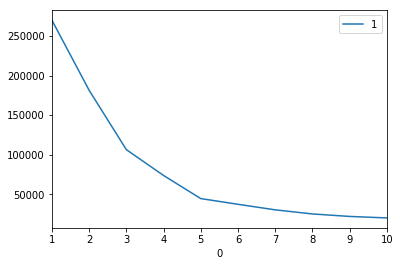

In [7]:
df.set_index(0).plot() # in this case we observe the elbow at cluster no 5 hence lets choose cluster number 5

In [8]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X)

In [9]:
X['labels'] = labels

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
X

,Annual Income (k$),Spending Score (1-100),labels
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,3
197,126,74,0
198,137,18,3


NameError: name 'centers' is not defined

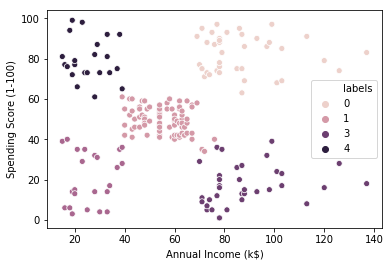

In [11]:
sns.scatterplot(data = X,x ='Annual Income (k$)',y='Spending Score (1-100)',hue='labels')
plt.scatter(centers[0],centers[1])

In [12]:
centers = pd.DataFrame(kmeans.cluster_centers_)